In [1]:
from fastai.vision.all import *

In [2]:
%matplotlib inline
%reload_ext autoreload

In [3]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [8]:
%cd /home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class

/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class


In [9]:
from pathlib import Path
path = Path('.')

In [10]:
dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_3_class', valid_pct= 0.2, item_tfms=Resize(224), shuffle=True, bs=16, seed=42)

In [11]:
dls.valid_ds

(#49) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0))...]

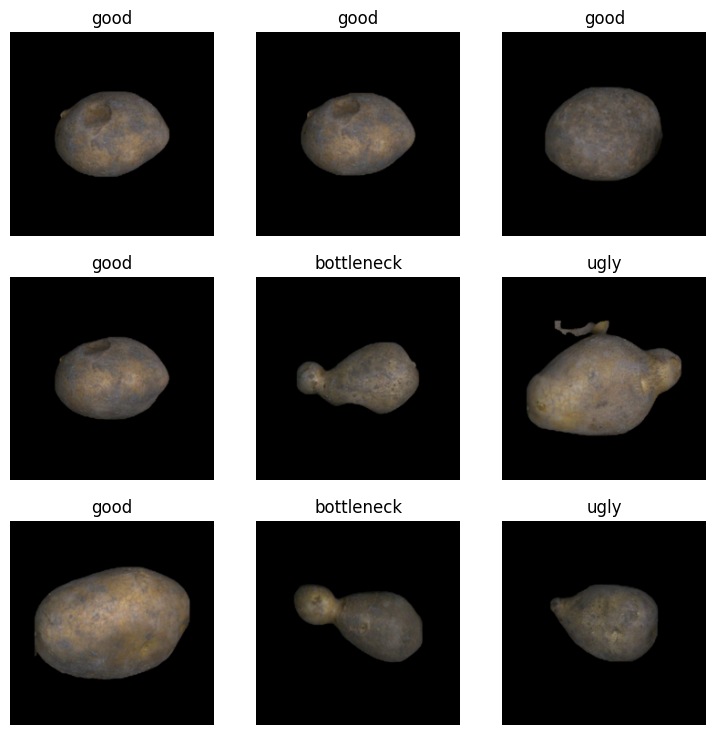

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [14]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.322430,1.064956,0.489796,00:05
1,1.197000,0.766507,0.326531,00:07
2,1.044389,0.414824,0.183673,00:06
3,0.860622,0.263294,0.102041,00:05
4,0.701793,0.199775,0.061224,00:06
5,0.576404,0.157009,0.061224,00:06
6,0.517525,0.129614,0.061224,00:06
7,0.465109,0.131202,0.040816,00:06
8,0.397577,0.115895,0.061224,00:06
9,0.345108,0.121158,0.040816,00:05


SuggestedLRs(valley=0.0002754228771664202)

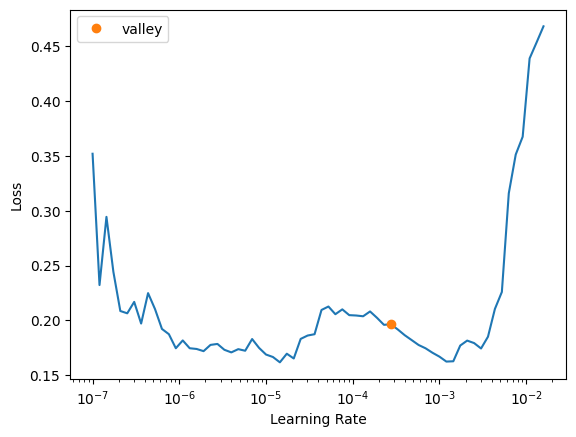

In [15]:
learn.lr_find()

In [16]:
learn.fine_tune(8, base_lr=0.0002754228771664202)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.168912,0.100231,0.061224,00:06
1,0.142170,0.087337,0.040816,00:06
2,0.144845,0.089853,0.061224,00:06
3,0.109822,0.058614,0.020408,00:07
4,0.095752,0.052704,0.040816,00:06
5,0.079775,0.034191,0.000000,00:06
6,0.070823,0.038170,0.000000,00:05
7,0.066571,0.044531,0.020408,00:06


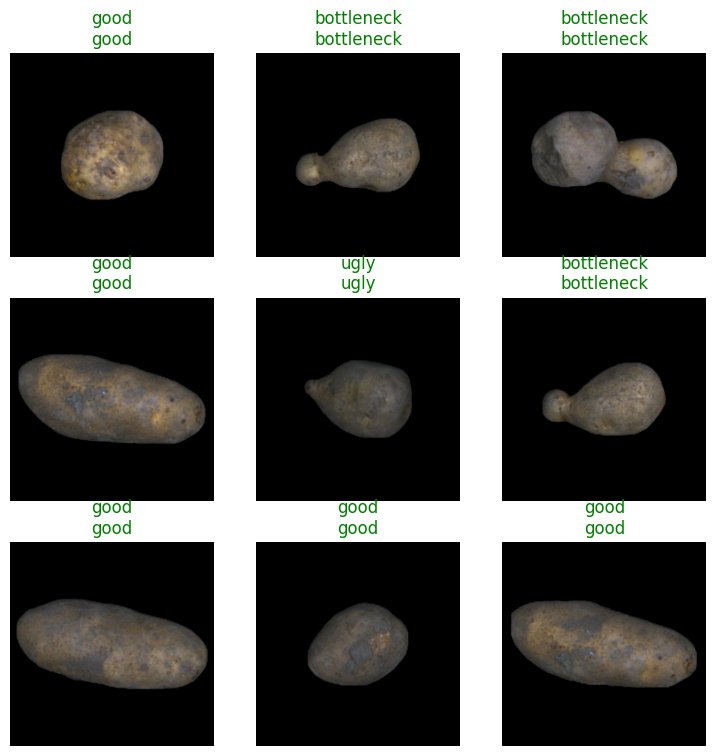

In [17]:
learn.show_results()

In [18]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [19]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.544393,0.949871,0.571429,00:05
1,1.454786,0.746234,0.693878,00:06
2,1.223273,0.613618,0.714286,00:06
3,1.099366,0.472395,0.775510,00:06
4,0.982786,0.376876,0.795918,00:06
5,0.877449,0.335671,0.857143,00:06
6,0.779521,0.285692,0.897959,00:06
7,0.728100,0.259557,0.918367,00:06
8,0.665100,0.251579,0.938776,00:06
9,0.616300,0.260355,0.918367,00:06


SuggestedLRs(valley=6.30957365501672e-05)

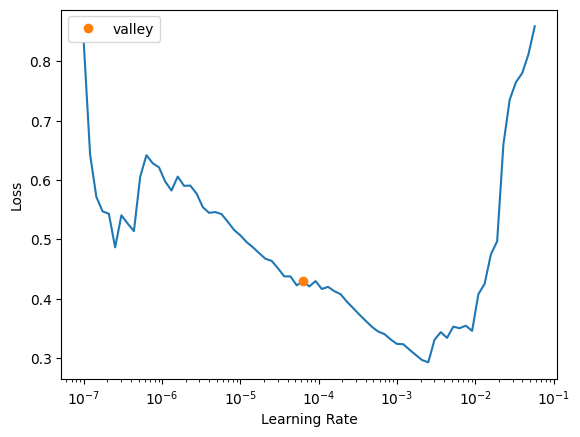

In [20]:
learn_accuracy.lr_find()

In [22]:
learn_accuracy.fine_tune(15, base_lr=6.30957365501672e-05)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.235997,0.126647,0.959184,00:06
1,0.232663,0.111420,0.959184,00:05
2,0.231721,0.112632,0.959184,00:06
3,0.217950,0.106827,0.959184,00:06
4,0.207908,0.091124,0.959184,00:06
5,0.194042,0.085633,0.959184,00:06
6,0.174125,0.075624,0.959184,00:05
7,0.168384,0.080270,0.959184,00:06
8,0.153384,0.076091,0.959184,00:06
9,0.148952,0.069080,0.959184,00:05


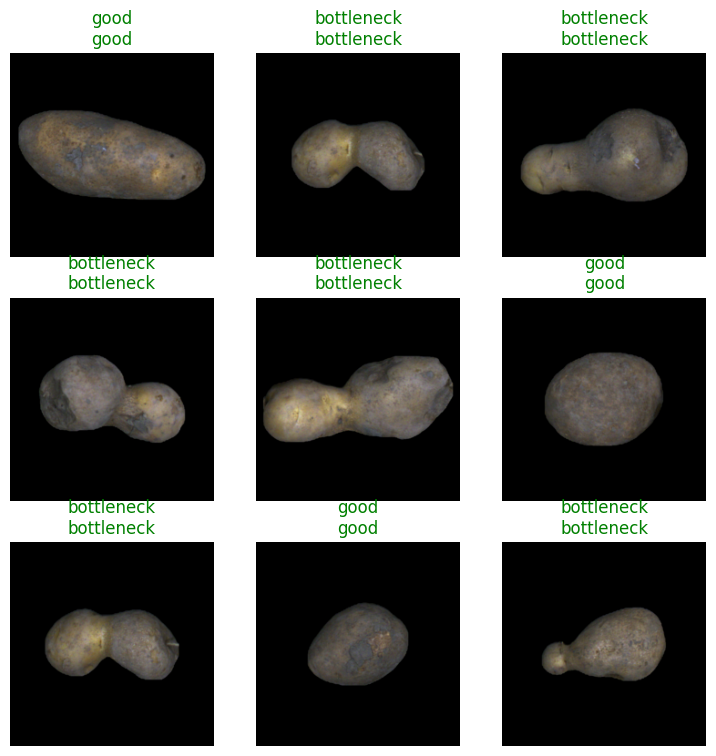

In [23]:
learn_accuracy.show_results()

In [20]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
learn.predict("/home/mishkat/Downloads/potato_good_malformed/int_potato.jpg")

('malformed', tensor(1), tensor([0.4603, 0.5397]))

In [24]:
learn.export("/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/models/export_3_class_80_20.pkl")

In [ ]:
# To load the model and run prediction
load_saved_model = load_learner("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/export_2_class_80_20.pkl")

In [ ]:
load_saved_model.predict()